In [1]:
from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r'C:\Users\Appsysm-3\Downloads\SalaryData_Test(1).csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
test = pd.read_csv(r'C:\Users\Appsysm-3\Downloads\SalaryData_Test(1).csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


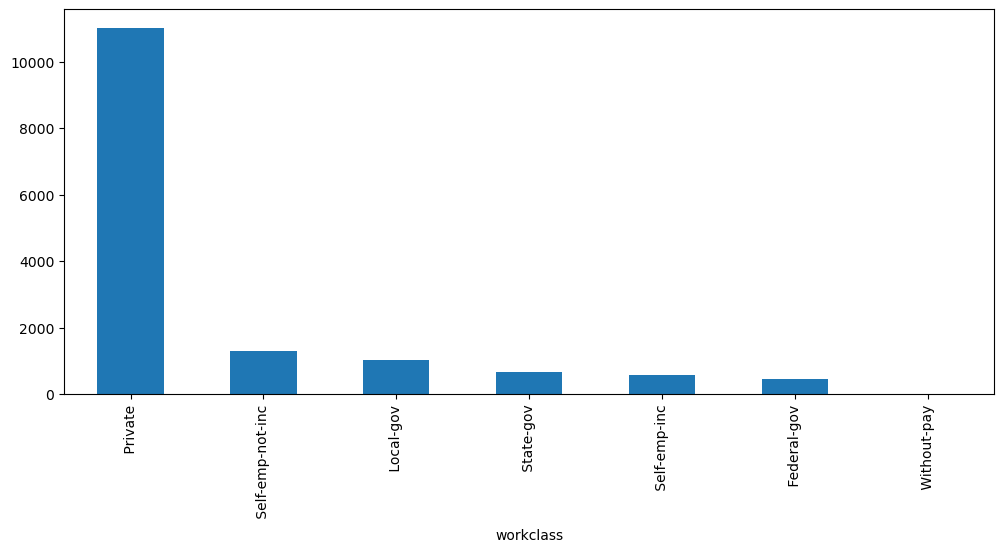

In [5]:
plt.figure(figsize=(12,5))
train.workclass.value_counts().plot.bar();

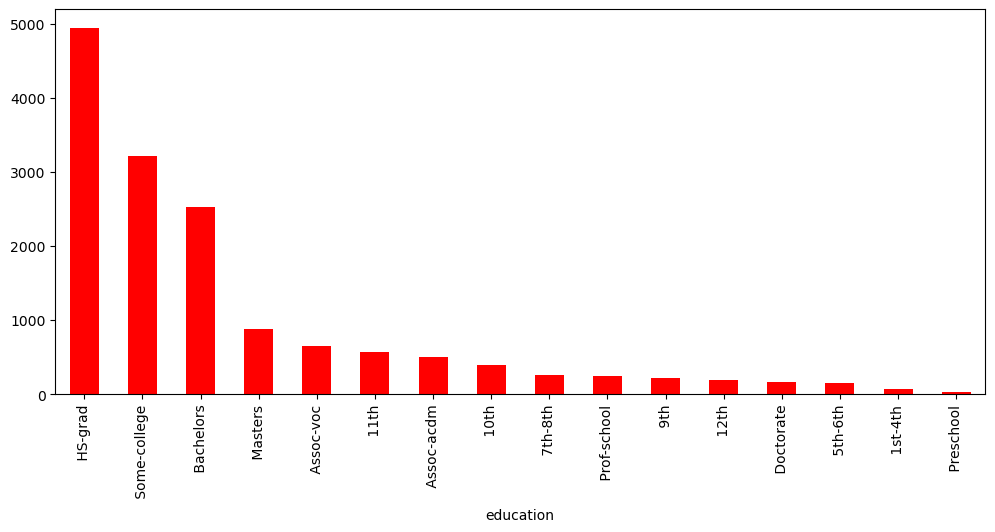

In [6]:
plt.figure(figsize=(12,5))
train.education.value_counts().plot.bar(color='red');

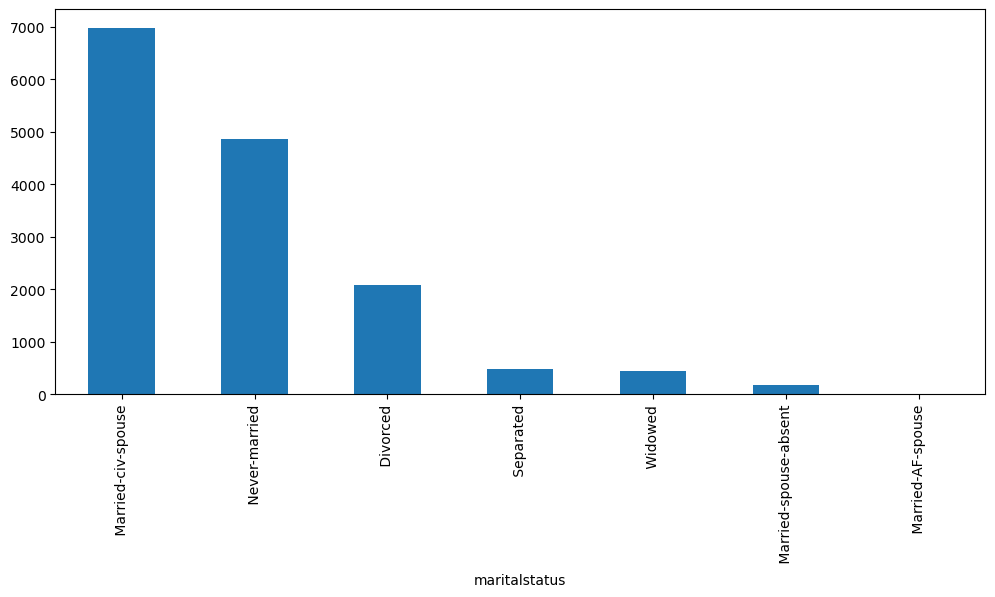

In [7]:
plt.figure(figsize=(12,5))
train.maritalstatus.value_counts().plot.bar();

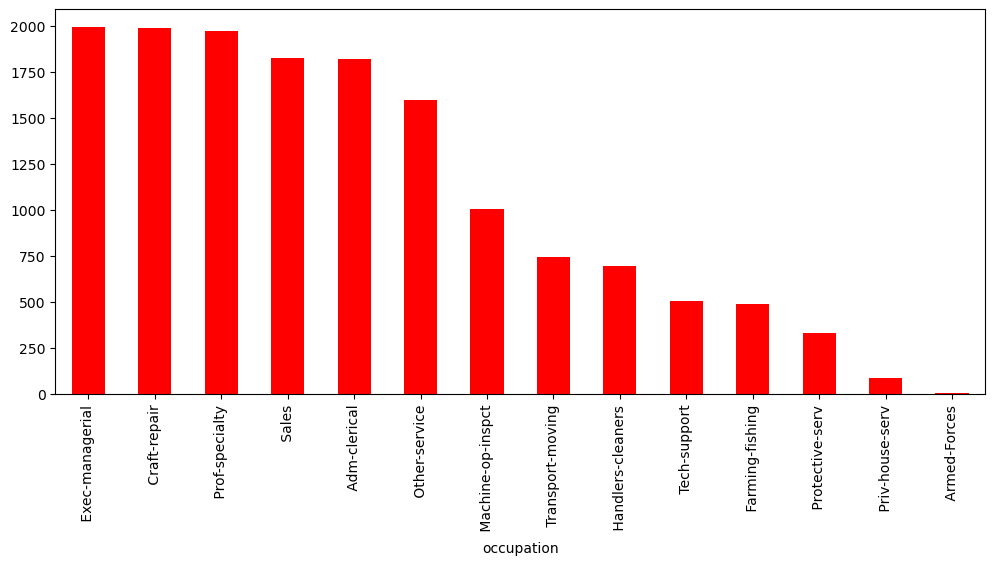

In [8]:
plt.figure(figsize=(12,5))
train.occupation.value_counts().plot.bar(color='red');

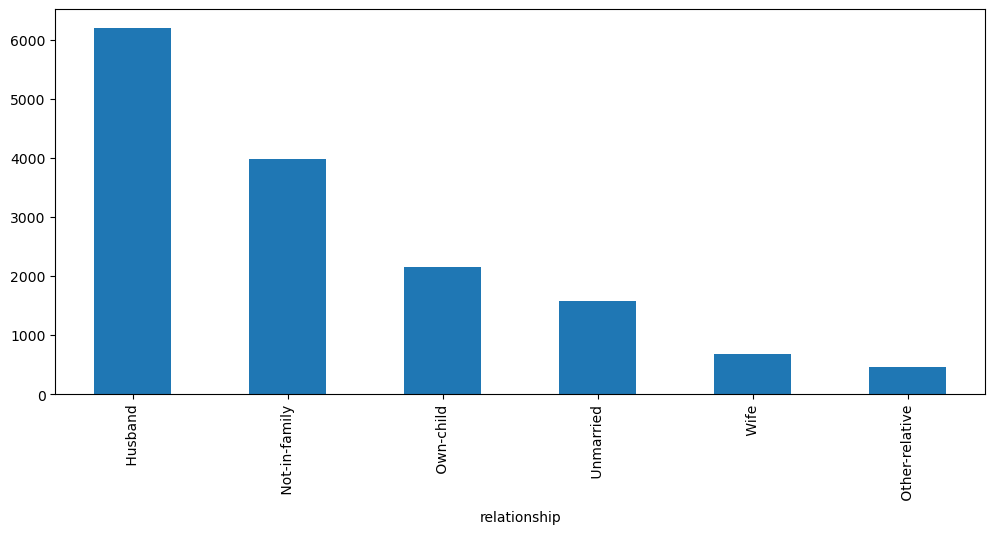

In [9]:
plt.figure(figsize=(12,5))
train.relationship.value_counts().plot.bar();

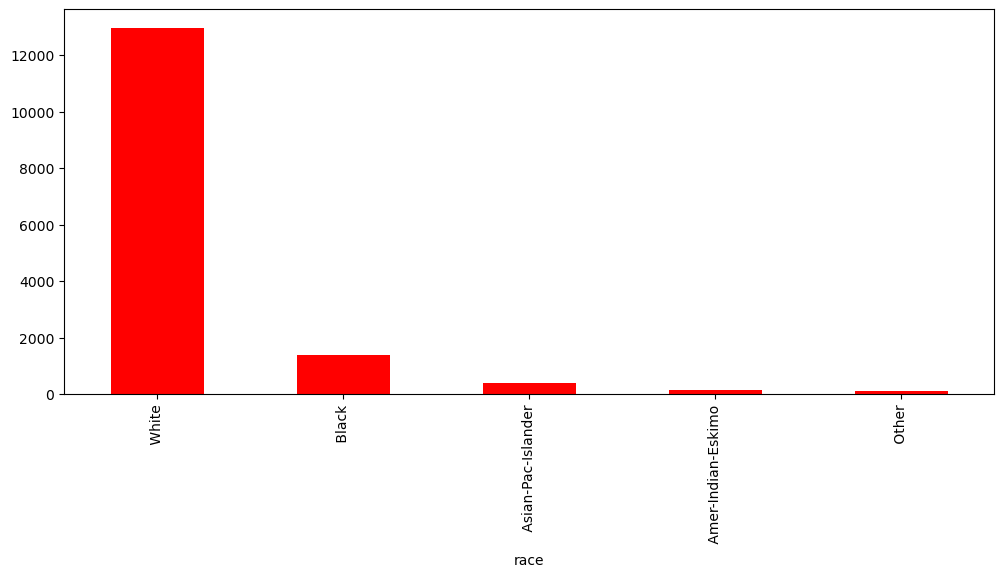

In [10]:
plt.figure(figsize=(12,5))
train.race.value_counts().plot.bar(color='red');

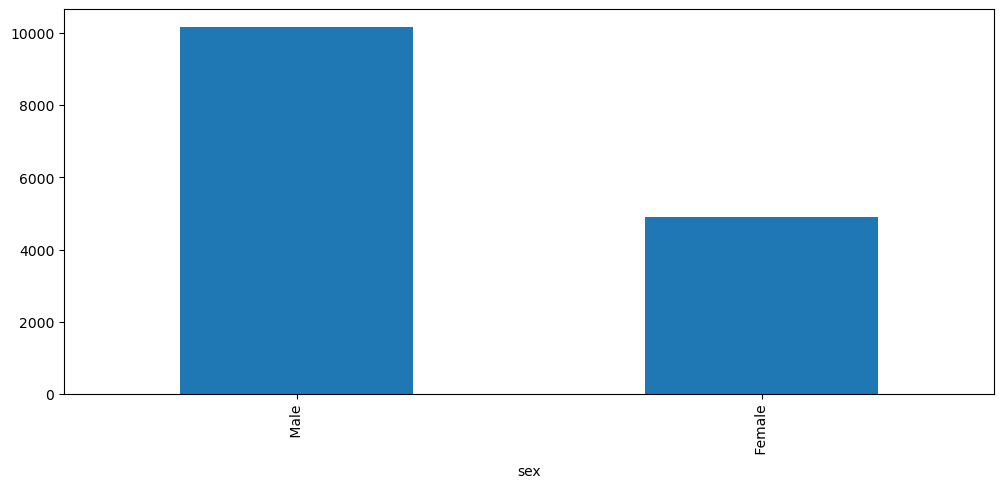

In [11]:
plt.figure(figsize=(12,5))
train.sex.value_counts().plot.bar();

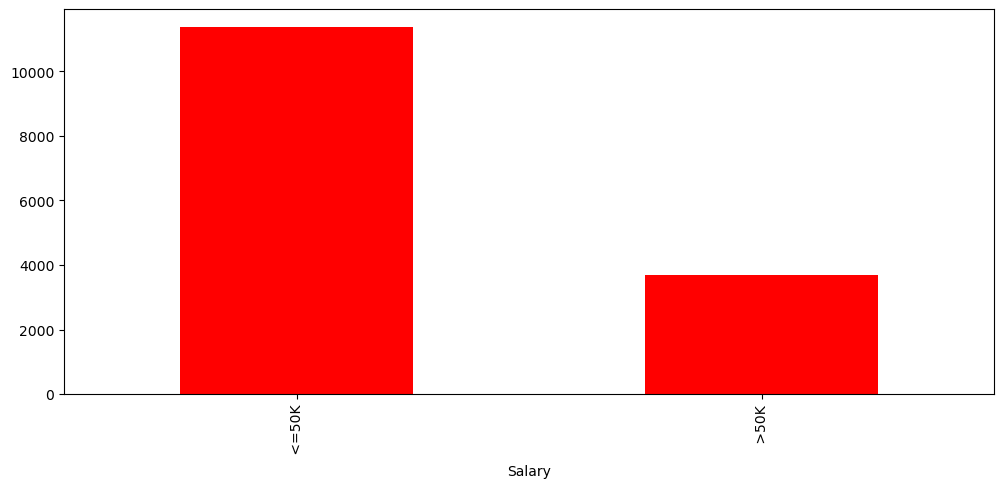

In [12]:
plt.figure(figsize=(12,5))
train.Salary.value_counts().plot.bar(color='red');

In [13]:
train1 = train.iloc[:,0:13]

train1 = pd.get_dummies(train1)
train1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,34,6,0,0,30,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
15056,39,13,0,0,36,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
15057,38,13,0,0,50,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
15058,44,13,5455,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [14]:
test1 = test.iloc[:,0:13]

test1 = pd.get_dummies(test1)
test1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,34,6,0,0,30,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
15056,39,13,0,0,36,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
15057,38,13,0,0,50,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
15058,44,13,5455,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [15]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(train1)
train_norm = sc.transform(train1)
train_norm  

array([[-1.02900513, -1.2165628 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.05742253, -0.43489824, -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.80479376,  0.73759862, -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       ...,
       [-0.05742253,  1.1284309 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [ 0.39100021,  1.1284309 ,  0.562734  , ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.2816339 ,  1.1284309 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441]])

In [16]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(test1)
test_norm = sc.transform(test1)
test_norm 

array([[-1.02900513, -1.2165628 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.05742253, -0.43489824, -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.80479376,  0.73759862, -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       ...,
       [-0.05742253,  1.1284309 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [ 0.39100021,  1.1284309 ,  0.562734  , ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.2816339 ,  1.1284309 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441]])

In [17]:
from sklearn.decomposition import PCA

train_pca = PCA(n_components = 102)
train_pca_values = train_pca.fit_transform(train_norm)
train_pca_values

array([[-2.24293780e+00,  2.60318091e+00, -3.27616503e-01, ...,
         2.66680915e-15, -2.45535425e-16, -5.97007647e-17],
       [ 2.22690391e+00,  1.59471521e+00, -7.32082794e-01, ...,
         1.42665567e-15,  1.73758092e-15,  4.63247367e-16],
       [ 2.30704416e+00, -1.16883181e+00, -2.00521481e-01, ...,
         3.14067449e-16, -1.87240777e-16,  1.31476107e-16],
       ...,
       [ 2.39583218e+00, -1.46859740e+00, -2.09424792e-01, ...,
        -2.42185573e-17,  3.15923772e-17, -3.15717504e-17],
       [-1.14039506e+00, -1.03678137e+00,  2.58079490e+00, ...,
         2.12655413e-16, -4.39153092e-17, -9.03893939e-17],
       [ 3.38445120e+00, -1.95481575e+00, -1.72791531e-01, ...,
         8.87910275e-17,  9.03928493e-17,  2.46675502e-18]])

In [18]:
from sklearn.decomposition import PCA

test_pca = PCA(n_components = 102)
test_pca_values = test_pca.fit_transform(test_norm)
test_pca_values

array([[-2.24293780e+00,  2.60318091e+00, -3.27616503e-01, ...,
         2.66680915e-15, -2.45535425e-16, -5.97007647e-17],
       [ 2.22690391e+00,  1.59471521e+00, -7.32082794e-01, ...,
         1.42665567e-15,  1.73758092e-15,  4.63247367e-16],
       [ 2.30704416e+00, -1.16883181e+00, -2.00521481e-01, ...,
         3.14067449e-16, -1.87240777e-16,  1.31476107e-16],
       ...,
       [ 2.39583218e+00, -1.46859740e+00, -2.09424792e-01, ...,
        -2.42185573e-17,  3.15923772e-17, -3.15717504e-17],
       [-1.14039506e+00, -1.03678137e+00,  2.58079490e+00, ...,
         2.12655413e-16, -4.39153092e-17, -9.03893939e-17],
       [ 3.38445120e+00, -1.95481575e+00, -1.72791531e-01, ...,
         8.87910275e-17,  9.03928493e-17,  2.46675502e-18]])

In [19]:
# The amount of variance that each PCA explains is 
var = train_pca.explained_variance_ratio_
var

array([4.44918491e-02, 3.04738722e-02, 2.54771248e-02, 2.29476941e-02,
       1.91173483e-02, 1.74365703e-02, 1.69729612e-02, 1.50198819e-02,
       1.41323412e-02, 1.37926681e-02, 1.29955151e-02, 1.27837642e-02,
       1.24579324e-02, 1.21769668e-02, 1.20884124e-02, 1.18816285e-02,
       1.16361847e-02, 1.15637948e-02, 1.14669041e-02, 1.12023341e-02,
       1.11093272e-02, 1.10676871e-02, 1.09034308e-02, 1.08468261e-02,
       1.06705234e-02, 1.06448917e-02, 1.06236196e-02, 1.05932709e-02,
       1.05244424e-02, 1.04833006e-02, 1.03939273e-02, 1.03654553e-02,
       1.03384466e-02, 1.02798662e-02, 1.02443455e-02, 1.02118249e-02,
       1.02086729e-02, 1.01176828e-02, 1.00629447e-02, 1.00180681e-02,
       9.93329938e-03, 9.89826168e-03, 9.88802295e-03, 9.86657309e-03,
       9.84617212e-03, 9.83187564e-03, 9.82515129e-03, 9.81706892e-03,
       9.81098105e-03, 9.79825806e-03, 9.79230707e-03, 9.77958279e-03,
       9.76888157e-03, 9.75932788e-03, 9.75167811e-03, 9.74131072e-03,
      

In [20]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 4.45,  7.5 , 10.05, 12.34, 14.25, 15.99, 17.69, 19.19, 20.6 ,
       21.98, 23.28, 24.56, 25.81, 27.03, 28.24, 29.43, 30.59, 31.75,
       32.9 , 34.02, 35.13, 36.24, 37.33, 38.41, 39.48, 40.54, 41.6 ,
       42.66, 43.71, 44.76, 45.8 , 46.84, 47.87, 48.9 , 49.92, 50.94,
       51.96, 52.97, 53.98, 54.98, 55.97, 56.96, 57.95, 58.94, 59.92,
       60.9 , 61.88, 62.86, 63.84, 64.82, 65.8 , 66.78, 67.76, 68.74,
       69.72, 70.69, 71.66, 72.63, 73.6 , 74.56, 75.52, 76.48, 77.43,
       78.38, 79.33, 80.27, 81.2 , 82.13, 83.05, 83.97, 84.89, 85.8 ,
       86.7 , 87.59, 88.47, 89.34, 90.2 , 91.05, 91.88, 92.69, 93.48,
       94.26, 95.03, 95.74, 96.45, 97.09, 97.7 , 98.28, 98.81, 99.28,
       99.69, 99.94, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96,
       99.96, 99.96, 99.96])

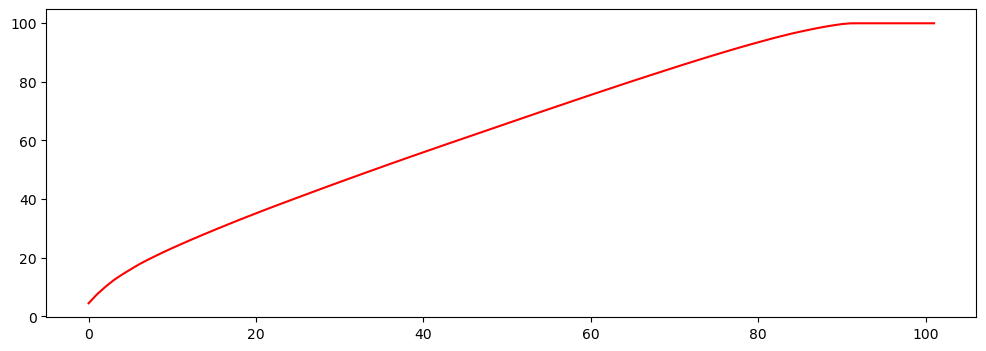

In [21]:
# Variance plot for PCA components obtained
plt.figure(figsize=(12,4))
plt.plot(var1,color="red");

In [22]:
finaltrain = pd.concat([pd.DataFrame(train_pca_values[:,0:90]),
                     train[['Salary']]], axis = 1)
finaltrain

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,Salary
0,-2.242938,2.603181,-0.327617,2.062024,-3.245808,0.812560,-0.442784,-1.685650,0.924250,1.891991,...,0.322344,-0.266021,0.252272,-0.426056,0.051791,0.853665,-0.773508,0.466166,-0.064770,<=50K
1,2.226904,1.594715,-0.732083,-0.582928,0.054350,0.429844,-0.039662,1.000275,0.209847,0.679798,...,-1.039511,0.061724,-0.355513,1.642111,-1.653340,-0.382266,-0.152825,-0.393192,0.398895,<=50K
2,2.307044,-1.168832,-0.200521,0.097952,-1.635067,2.571033,1.024094,-0.651146,-1.099703,-3.652572,...,-0.314783,0.077195,-0.472801,0.653684,1.100821,-0.205823,0.020513,-0.194492,0.308206,>50K
3,1.080755,1.260533,0.937857,-0.024262,-3.174398,-0.970844,-0.340336,-1.973938,-0.711191,1.075373,...,0.651033,0.491425,0.776518,0.289192,0.192050,-0.267516,-0.415089,-0.484431,0.364319,>50K
4,-1.759546,1.778058,-1.256430,0.402017,0.646302,1.112461,-0.656860,0.304387,1.071483,0.751177,...,-0.341200,0.427165,0.069133,-0.864467,0.492786,-0.925634,0.280922,0.994358,-0.493925,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.603437,-1.380653,-1.217944,3.023232,0.463631,0.320846,0.117746,-0.907320,1.101617,0.372391,...,-0.188856,0.102889,0.003352,0.969400,0.325052,1.506765,-0.047672,0.319851,-1.221906,<=50K
15056,-1.670443,-3.020764,0.059822,-0.326201,1.744026,-0.876546,-1.136618,-0.761872,0.720123,-0.079865,...,-0.158983,0.387623,-0.149291,0.919562,0.137806,0.821065,-0.053937,-1.401547,-0.662635,<=50K
15057,2.395832,-1.468597,-0.209425,1.122402,0.364606,-0.944486,0.190120,-1.382649,0.773748,0.171544,...,-0.488672,-0.211695,0.427440,0.216012,0.330597,0.638795,0.215296,-0.532991,-1.089635,<=50K
15058,-1.140395,-1.036781,2.580795,2.251643,-1.495169,-1.684794,-0.913144,2.031935,-0.905050,-0.245674,...,1.018273,2.174690,-0.425788,0.167408,0.560413,2.514837,-0.992345,1.516196,-0.091726,<=50K


In [23]:
finaltest = pd.concat([pd.DataFrame(test_pca_values[:,0:90]),
                     test[['Salary']]], axis = 1)
finaltest

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,Salary
0,-2.242938,2.603181,-0.327617,2.062024,-3.245808,0.812560,-0.442784,-1.685650,0.924250,1.891991,...,0.322344,-0.266021,0.252272,-0.426056,0.051791,0.853665,-0.773508,0.466166,-0.064770,<=50K
1,2.226904,1.594715,-0.732083,-0.582928,0.054350,0.429844,-0.039662,1.000275,0.209847,0.679798,...,-1.039511,0.061724,-0.355513,1.642111,-1.653340,-0.382266,-0.152825,-0.393192,0.398895,<=50K
2,2.307044,-1.168832,-0.200521,0.097952,-1.635067,2.571033,1.024094,-0.651146,-1.099703,-3.652572,...,-0.314783,0.077195,-0.472801,0.653684,1.100821,-0.205823,0.020513,-0.194492,0.308206,>50K
3,1.080755,1.260533,0.937857,-0.024262,-3.174398,-0.970844,-0.340336,-1.973938,-0.711191,1.075373,...,0.651033,0.491425,0.776518,0.289192,0.192050,-0.267516,-0.415089,-0.484431,0.364319,>50K
4,-1.759546,1.778058,-1.256430,0.402017,0.646302,1.112461,-0.656860,0.304387,1.071483,0.751177,...,-0.341200,0.427165,0.069133,-0.864467,0.492786,-0.925634,0.280922,0.994358,-0.493925,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.603437,-1.380653,-1.217944,3.023232,0.463631,0.320846,0.117746,-0.907320,1.101617,0.372391,...,-0.188856,0.102889,0.003352,0.969400,0.325052,1.506765,-0.047672,0.319851,-1.221906,<=50K
15056,-1.670443,-3.020764,0.059822,-0.326201,1.744026,-0.876546,-1.136618,-0.761872,0.720123,-0.079865,...,-0.158983,0.387623,-0.149291,0.919562,0.137806,0.821065,-0.053937,-1.401547,-0.662635,<=50K
15057,2.395832,-1.468597,-0.209425,1.122402,0.364606,-0.944486,0.190120,-1.382649,0.773748,0.171544,...,-0.488672,-0.211695,0.427440,0.216012,0.330597,0.638795,0.215296,-0.532991,-1.089635,<=50K
15058,-1.140395,-1.036781,2.580795,2.251643,-1.495169,-1.684794,-0.913144,2.031935,-0.905050,-0.245674,...,1.018273,2.174690,-0.425788,0.167408,0.560413,2.514837,-0.992345,1.516196,-0.091726,<=50K


In [24]:
#Since the training dataset is huge, we'll use some part of it for the training purpose, to reduce time consumed.
array = finaltrain.values
X = array[0:1000,0:90]
Y = array[0:1000,90]

# SVM Classification

In [25]:
!pip install scikit-learn

In [26]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [27]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.9,0.5,0.1],'C':[1,10,100] },
             {'kernel':['linear'],'C':[1,10,100]}]
gsv = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
gsv.fit(X,Y)

gsv.best_params_ , gsv.best_score_

({'C': 1, 'kernel': 'linear'}, 0.806)

In [28]:
x = finaltest.values[0:1000,0:90]
y = finaltest.values[0:1000,90]

In [30]:
#SVM Clasification
clf = SVC(C=10, kernel='linear')
clf.fit(x,y)
results = clf.score(x,y)
print(np.round(results, 4))

0.846


# Bagging

In [31]:
# Bagged Decision Trees for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model.fit(x,y)
results = model.score(x,y)
print(np.round(results, 4))

0.999


# Random Forest

In [32]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(x,y)
results = model.score(x,y)
print(np.round(results, 4))

0.999


# boosting

In [33]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
num_trees = 100
seed=7

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model.fit(x,y)
results = model.score(x,y)
print(np.round(results, 4))

0.942


# Stacking

In [34]:
# Stacking Ensemble for Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [35]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = DecisionTreeClassifier()
estimators.append(('cart', model))
model = SVC()
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(x,y)
results = ensemble.score(x,y)
print(np.round(results, 4))

0.886


In [36]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = DecisionTreeClassifier()
estimators.append(('cart', model))
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('Boosting', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(x,y)
results = ensemble.score(x,y)
print(np.round(results, 4))

0.952


# Hence we can conclude SVM hows the accurate model.